In [70]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [71]:
#import datasets
data = pd.read_csv("../content/spam.csv",encoding='latin-1')


In [72]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [73]:
#drop unwanted columns and name change
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [74]:
# convert label to a numerical variable
data['label'] = data.label.map({'ham':0, 'spam':1})

In [75]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
#count observations in each label
data.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [77]:
#text transformation (stopwords,lowering,stemming) and creating bag of words model using CountVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [78]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    review = ' '.join(review)
    corpus.append(review)

In [80]:
data['text_refined']=corpus

In [81]:
data.head()

,label,text,text_refined
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


# TF-IDF


In [82]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer().fit(data['text_refined'])

In [83]:
cvt = cv.transform(data['text_refined'])

In [84]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(cvt)
messages_tfidf = tfidf_transformer.transform(cvt)

In [85]:
from sklearn.pipeline import Pipeline

In [86]:
X = data['text_refined']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=0)



In [87]:
nbpl = Pipeline([
    ('cv', CountVectorizer()),
    ('transform', TfidfTransformer()), 
    ('alg', LogisticRegression())])

In [88]:
nbpl.fit(X_train,y_train)
nbpred = nbpl.predict(X_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       465
           1       0.99      0.75      0.85        93

    accuracy                           0.96       558
   macro avg       0.97      0.88      0.91       558
weighted avg       0.96      0.96      0.95       558


 confusion matrix


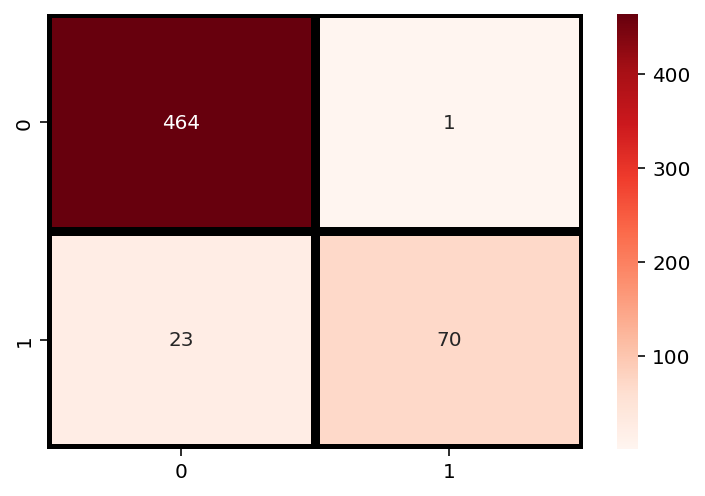

In [89]:
print(classification_report(y_test,nbpred))
print('\n confusion matrix')
sns.heatmap(confusion_matrix(y_test,nbpred),annot=True,fmt='g',cmap='Reds',linecolor='black',linewidths=4)

In [90]:
#showing first and last 20 features names
print(cv.get_feature_names()[0:20])
print(cv.get_feature_names()[-20:])

['aa', 'aah', 'aaniy', 'aaooooright', 'aathi', 'ab', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'abil', 'abiola', 'abj', 'abl', 'abnorm', 'abouta', 'abroad', 'absenc']
['yunni', 'yuo', 'yuou', 'yup', 'yupz', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zero', 'zf', 'zhong', 'zindgi', 'zoe', 'zogtoriu', 'zoom', 'zouk', 'zs', 'zyada']


In [91]:
print(X.shape,y.shape)

(5572,) (5572,)


In [93]:
#Visualisations
from wordcloud import WordCloud

In [94]:
ham_words = ''
spam_words = ''
spam = data[data.label == 1]
ham = data[data.label ==0]

In [95]:
for val in spam.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
        spam_words = spam_words + words + ' '
    
for val in ham.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
          ham_words = ham_words + words + ' '
            

In [96]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

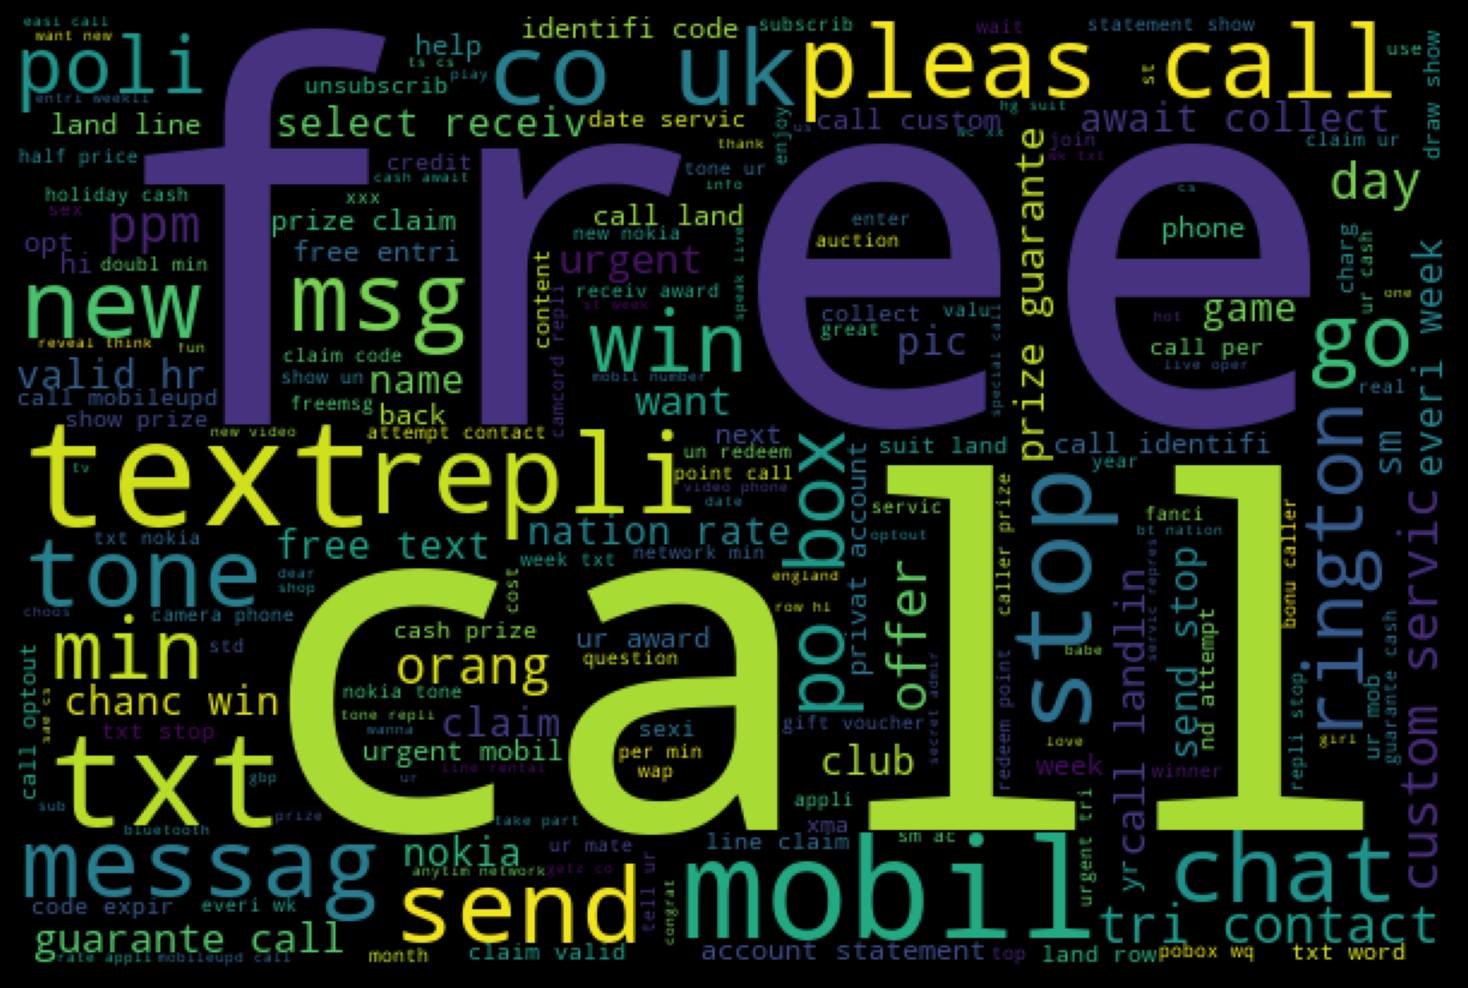

In [97]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

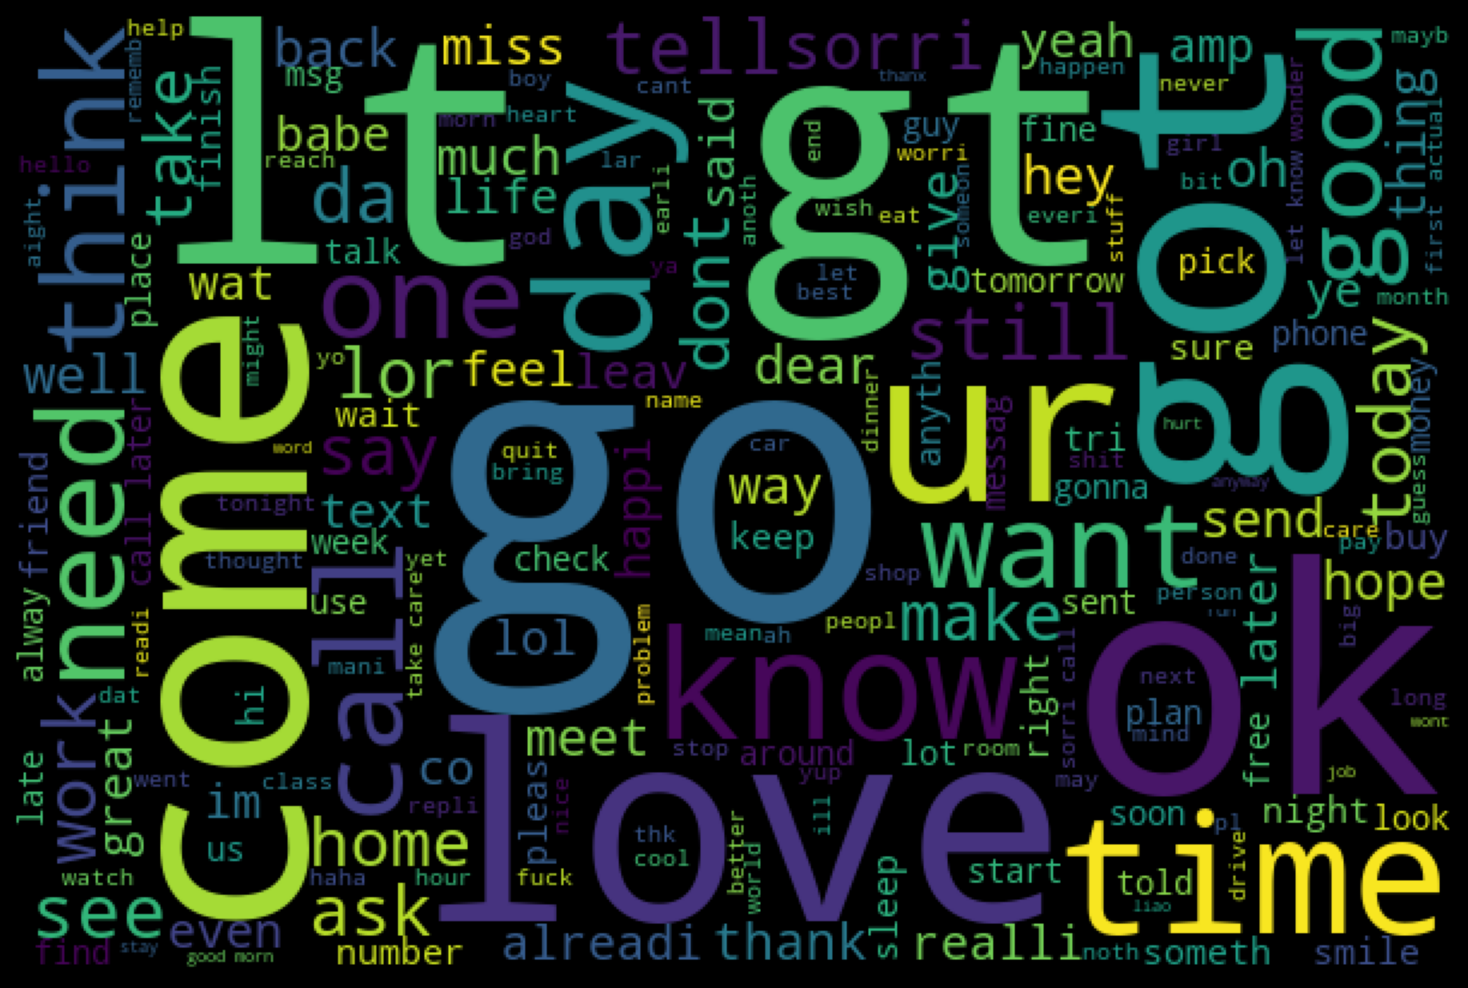

In [98]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()